## 思考题
1. primitives 和 container 的区别和联系是什么？
- 联系
  - 我们在图中可以看到的部分都是由matplotlib中的Artist绘制的，其中Primitives和Containers是Artist的两种形式
  - Primitives 拥有自己的属性， Containers 也拥有自己的属性
- 区别
  - Primitives 包含标准图形对象，将会被绘制到画布中，例如`Line2D, Rectrangle, Text, AxesImage`
  - Containers 是我们用来存放 Primitives 的地方，例如`Axis, Axes, Figure`

2. 四个容器的联系和区别是什么？他们分别控制一张图表的哪些要素？

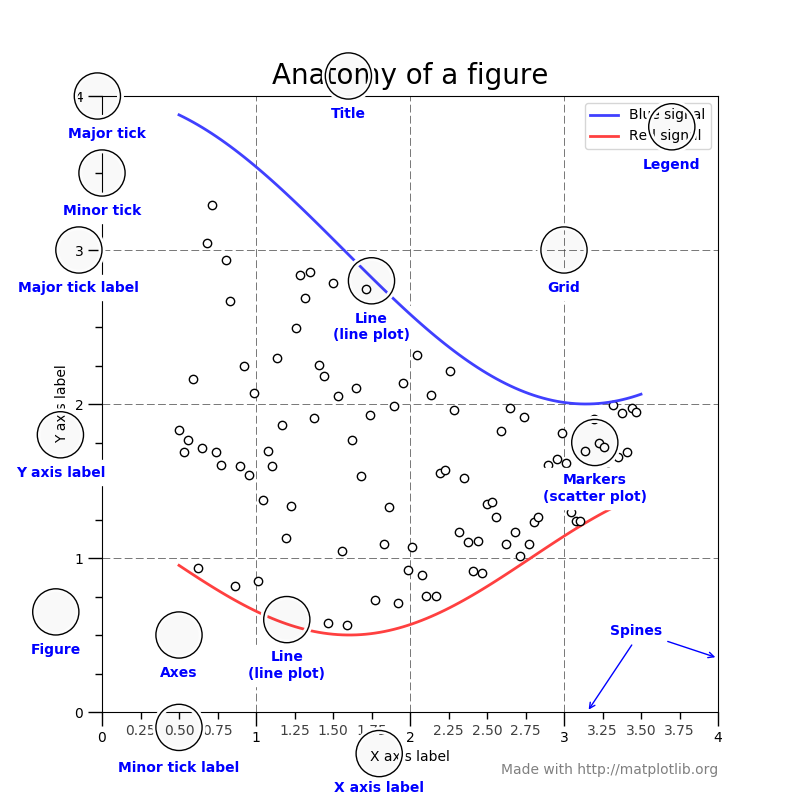
- Figure => 理解成画板/绘画空间即可，我们所有的绘画内容都会呈现在Figure上，Figure包含所有的Axes（如果希望Figure有意义，则至少包含一个Axes）
- Axes => 坐标轴组合，可以理解为坐标系（也可以理解为一个子图）。
  - Axis指的是具体的坐标轴，如x,y,z轴，Axes是Axis的复数形式，也就是代表着一套坐标轴。一套坐标轴可以构成一个绘画空间，所以我们也可以理解为子图
  - 当我们只有一个Axes时，`plt.plot()`和`ax.plot()`作用相同，当我们有多个Axes时，则需要在对应的Axes里面绘图`axs[i].plot()`
- Axis => 坐标轴，包含刻度和标签 - tick | labels
- Tick => 刻度，是Figure->Axes->Axis->Tick等级结构中最末端的容器对象

## 绘图题
1. 教程中展示的案例都是单一图，请自行创建数组，画出包含六个子图的线图，要求：
  - 子图的排布是 2 x 3
  - 线图可用教程中 Line2D 方法绘制
  - 需要设置每个子图的横坐标和纵坐标刻度
  - 设置整个图的标题，横坐标名称，纵坐标名称


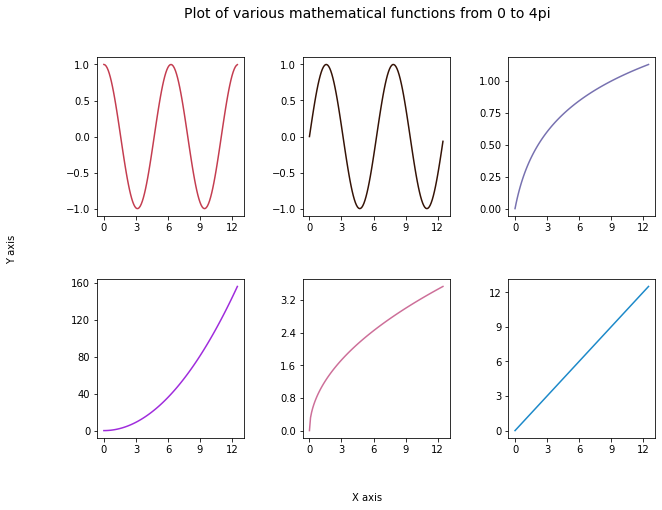

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
import sys

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7))
x = np.arange(0, 4 * np.pi, 0.1)
ys = [np.cos(x), np.sin(x), np.log10(x+1), x**2, x**0.5, x] # Various mathematical functions
for i in range(6):
  rows = i // 3 # the rows, cols of different axes
  cols = i % 3
  r, g, b = random.random(), random.random(), random.random() # Random RGB color
  axs[rows, cols].plot(x, ys[i], c = (r, g, b))
  axs[rows, cols].xaxis.set_major_locator(ticker.MaxNLocator(5)) # Set tick interval
  axs[rows, cols].yaxis.set_major_locator(ticker.MaxNLocator(5))

fig.suptitle('Plot of various mathematical functions from 0 to 4pi', fontsize = 14)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4) # Change the subplot locations
fig.text(0.5, 0, 'X axis', ha = 'center')
fig.text(0, 0.5, 'Y axis', va = 'center', rotation = 'vertical')

plt.show()

2. 分别用一组长方形柱和填充面积的方式模仿画出下图，函数 $y= -1*(x-2)*(x-8) + 10$，在区间 [2,9] 的积分面积

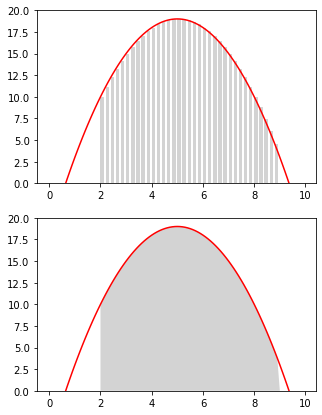

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon
import numpy as np
import random
import sys

def f(x):
  return 10 - (x - 2) * (x - 8)

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 7))
x, y = np.arange(0, 10, 0.1), f(x)
lo, hi = 2, 9 # [low = 2, high = 9]

clr = 211 / 255 # RGB
integral_x = np.arange(lo, hi, 0.1)
integral_y = f(integral_x) # Integration interval
# axs[0]
'''
  Use NumPy’s arange() function to generate the range of float numbers in Python.
  The arange() function has the same syntax and functionality 
as a Python built-in range() function and supports floating-point numbers 
in all of its arguments.
'''
for i in np.arange(2.0, 9.0, 0.2):
  rect = plt.Rectangle((i, 0), 0.09, f(i), color = (clr, clr, clr))
  axs[0].add_patch(rect)
axs[0].set_ylim(0, 20)
axs[0].plot(x, y, c = 'r')

# axs[1]
'''
  zip() Returns an iterator of tuples, where the i-th tuple contains the i-th 
element from each of the argument sequences or iterables. 
  zip() in conjunction with the * operator can be used to unzip a list
  So we can use '+' operation in list to generate vertex set.
'''
vertices = np.array([(lo, 0)] + [*zip(integral_x, integral_y)] + [(hi, 0)])
poly = Polygon(vertices, facecolor = (clr, clr, clr))
axs[1].set_ylim(0, 20)
axs[1].add_patch(poly)
axs[1].plot(x, y, c = 'r')



plt.show()

## 笔记

### 操作符 `,=`
`ax.plot()`和`plt.plot()`都会返回一个只有一个元素的tuple，通过在赋值时加一个逗号，可以让Python把返回值unpack，并把解包后得到的每一个值按顺赋给左侧对应的变量。

```
line, = plt.plot(x, y)
[line] = plt.plot(x, y)
line = plt.plot(x, y)[0]
```
三者本质上是等价的

**References**

x, = … - is this trailing comma the comma operator?
https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator

### Rectangle 对象生成 Hist
这部分需要一定的 pandas 知识，查阅文档后方便理解每一步代码的具体作用。

[80, 90)
[60, 70)
[20, 30)
[10, 20)
[30, 40)
[0, 10)
[70, 80)
[40, 50)
[90, 100)
[50, 60)


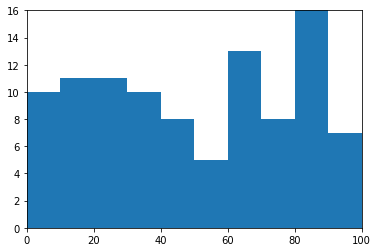

In [43]:
import pandas as pd
import re
x = np.random.randint(0, 100, 100) # 生成[0,100)的随机数
bins = np.arange(0, 101, 10) # 直方图的边界值/分布区间 => array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

df = pd.DataFrame(columns = ['data']) # 生成一个仅有data column的DataFrame
'''
|data|

'''
df.loc[:, 'data'] = x # 将x的值依次赋值给data column

'''
| |data|
|0|60|
|1|12|
|2|61|
|.||...|
|98|22|
|99|
[100 rows x 1 columns]
'''
df['boxes'] = pd.cut(df['data'], bins = bins, right = False, 
                    include_lowest = True) # 对数据进行分箱操作
'''
pd.cut() => Bin values into discrete intervals.
parameters
  - right = False 区间左闭右开
  - include_lowest = True 包含最小值

	data	boxes
0	  2	  [0, 10)
1	  0	  [0, 10)
2	  11	[10, 20)
3	  4	  [0, 10)
4	  55	[50, 60)
...	...	...
95	22	[20, 30)
96	24	[20, 30)
97	98	[90, 100)
98	53	[50, 60)
99	35	[30, 40)

每一行代表的意义为，[索引，数据，应该在哪个区间（箱子）]
'''

df_cnt = df['boxes'].value_counts().reset_index() # 为每个区间的数据计数
'''
   index	 boxes
0	[20, 30)	16
1	[30, 40)	14
2	[90, 100)	12
3	[60, 70)	12
4	[40, 50)	10
5	[50, 60)	9
6	[0, 10)	8
7	[80, 90)	7
8	[70, 80)	7
9	[10, 20)	5
'''
for x in df_cnt['index']:
  print(x)
'''
df_cnt['index']中的元素为
[10, 20)
[20, 30)
[60, 70)
[80, 90)
[50, 60)
[40, 50)
[90, 100)
[70, 80)
[30, 40)
[0, 10)
.astype(str)将上述元素转换为字符串，并从中用正则表达式提取min_index和max_index
.astype(int)将提取完成后的str转换为int存储在df_cnt.loc[:,'mini']或者df_cnt.loc[:,'maxi']中
相当于在原有df_cnt的基础上又增加了两列mini,maxi
'''
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini'] # 记录宽度
df_cnt.sort_values('mini', ascending = True, inplace = True) # 按mini从小到大排序
df_cnt.reset_index(inplace = True, drop = True)
'''
    index	  boxes	  mini	maxi	width
0	  [0, 10)	  12	  0	    10	    10
1	  [10, 20)	10	  10	  20	    10
2	  [20, 30)	10	  20	  30	    10
3	  [30, 40)	6	    30	  40	    10
4	  [40, 50)	10	  40	  50	    10
5	  [50, 60)	11	  50	  60	    10
6	  [60, 70)	8	    60	  70	    10
7	  [70, 80)	14	  70	  80	    10
8	  [80, 90)	9	    80	  90	    10
9	  [90, 100)	10	  90	  100   	10

'''

# Rectangle 绘制 hist
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111) # one row, one column, first plot

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),
                          df_cnt.loc[i,'width'],df_cnt.loc[i,'boxes'])
    ax1.add_patch(rect)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()